[*********************100%***********************]  1 of 1 completed


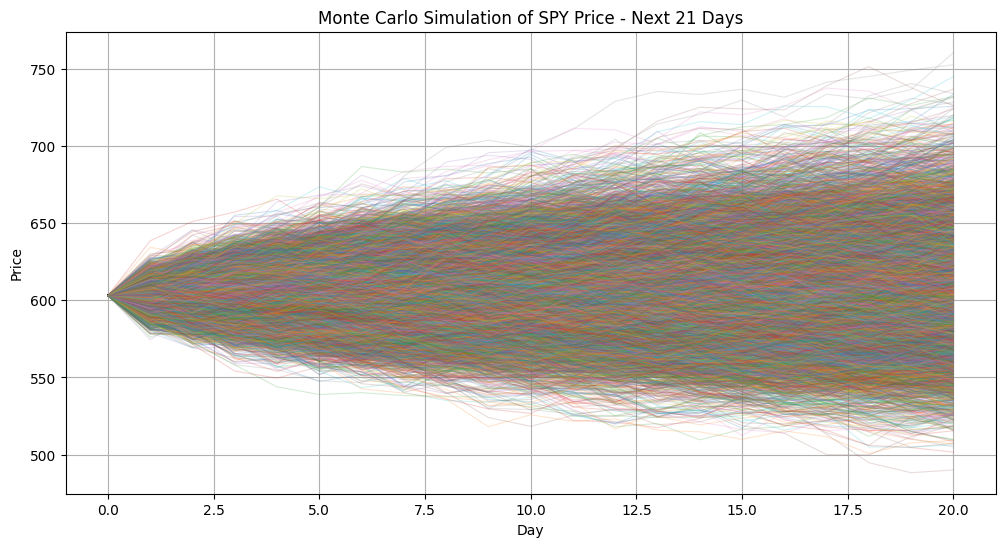

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Parameters
ticker = "SPY"
start_date = "2024-06-01"
end_date = "2025-06-11"
num_simulations = 10000
num_days = 21

price_above_x = 600  # Example price threshold X - Upper Threhold
price_below_y = 560  # Example price threshold Y - Lower Threhold

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)
close_prices = data['Close']
log_returns = np.log(1 + close_prices.pct_change().dropna())

# Calculate drift and volatility
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var*2)
volatility = log_returns.std()

# Starting price = last known price
S0 = close_prices.iloc[-1]

# Simulation
np.random.seed(42)
daily_returns = np.exp(drift.values + volatility.values * np.random.randn(num_days, num_simulations))

# Price paths
price_paths = np.zeros_like(daily_returns)
price_paths[0] = S0

for t in range(1, num_days):
    price_paths[t] = price_paths[t - 1] * daily_returns[t]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(price_paths, linewidth=0.8, alpha=0.2)
plt.title(f"Monte Carlo Simulation of {ticker} Price - Next {num_days} Days")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

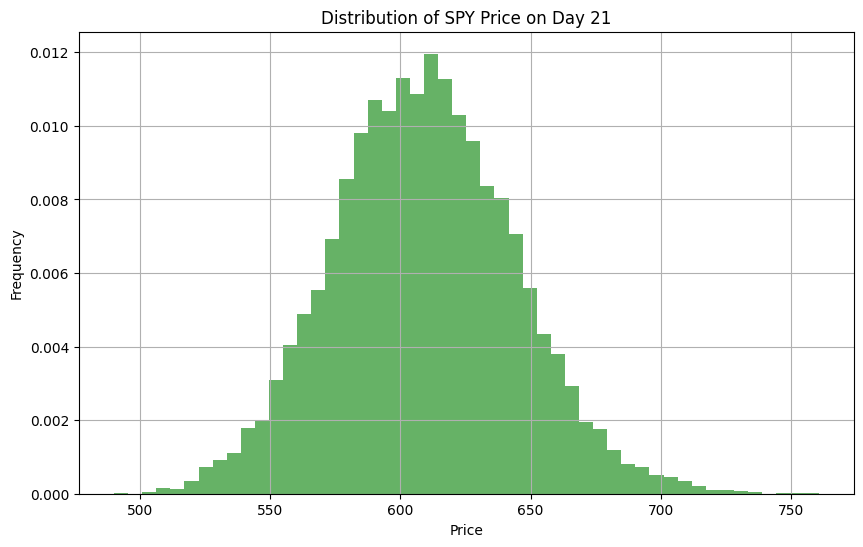

In [106]:
# Plotting the distribution of the final prices
plt.figure(figsize=(10, 6))
plt.hist(price_paths[-1, :], bins=50, density=True, alpha=0.6, color='g')
plt.title(f"Distribution of {ticker} Price on Day {num_days}")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [107]:
# Calculate confidence intervals
confidence_level = 0.8
lower_bound = np.percentile(price_paths[-1, :], (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(price_paths[-1, :], (1 + confidence_level) / 2 * 100)

print(f"Confidence Interval ({confidence_level*100}%): [{lower_bound:.2f}, {upper_bound:.2f}]")

Confidence Interval (80.0%): [565.14, 653.36]


In [110]:
# prompt: give 2 parameter input and determinate the confidennce level of price above X or price below Y

# Add parameters for price thresholds
#price_above_x = 220  # Example price threshold X
#price_below_y = 555  # Example price threshold Y

# Calculate confidence level for price above X
confidence_above_x = np.sum(price_paths[-1, :] > price_above_x) / num_simulations * 100

# Calculate confidence level for price below Y
confidence_below_y = np.sum(price_paths[-1, :] < price_below_y) / num_simulations * 100

print(f"Confidence Level of Price above {price_above_x:.2f} on Day {num_days}: {confidence_above_x:.2f}%")
print(f"Confidence Level of Price below {price_below_y:.2f} on Day {num_days}: {confidence_below_y:.2f}%")


Confidence Level of Price above 600.00 on Day 21: 59.78%
Confidence Level of Price below 555.00 on Day 21: 5.57%
